In [96]:

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

Parameter containing:
tensor([[-0.1105]], requires_grad=True)
Parameter containing:
tensor([0.5247], requires_grad=True)


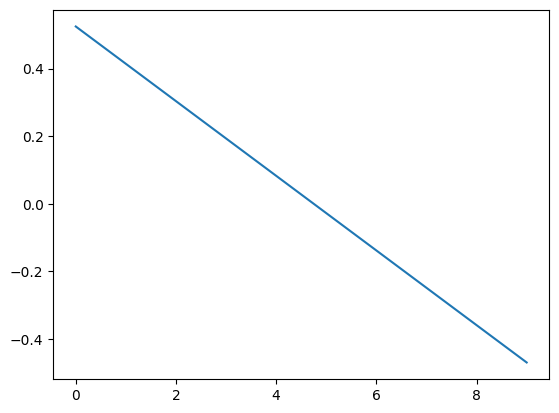

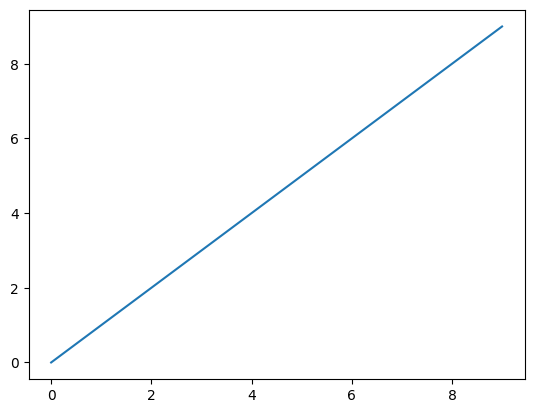

In [97]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)

print(f'{linear_model.weight}')
print(f'{linear_model.bias}')

batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()

# with torch.no_grad():
linear_model.bias = nn.Parameter(torch.tensor([[0]], dtype=torch.float))
linear_model.weight = nn.Parameter(torch.tensor([[1]], dtype=torch.float))
batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()

In [98]:
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [99]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 1,  7,  3, 10,  6,  4,  8,  9,  0]), tensor([2, 5]))

In [100]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [101]:
linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)
print(f'{linear_model.weight}')
print(f'{linear_model.bias}')
x = torch.ones(10, 1)
linear_model(x)

Parameter containing:
tensor([[0.1882]], requires_grad=True)
Parameter containing:
tensor([-0.4441], requires_grad=True)


tensor([[-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559],
        [-0.2559]], grad_fn=<AddmmBackward0>)

In [102]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.6500]], requires_grad=True),
 Parameter containing:
 tensor([0.1863], requires_grad=True)]

In [103]:

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [104]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 279.5430, Validation loss 222.3047
Epoch 1000, Training loss 3.8823, Validation loss 1.4520
Epoch 2000, Training loss 3.3587, Validation loss 1.0939
Epoch 3000, Training loss 3.3497, Validation loss 1.0531

Parameter containing:
tensor([[5.3265]], requires_grad=True)
Parameter containing:
tensor([-17.1025], requires_grad=True)


In [105]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 274.4150, Validation loss 215.5632
Epoch 1000, Training loss 3.9091, Validation loss 1.4634
Epoch 2000, Training loss 3.3591, Validation loss 1.0950
Epoch 3000, Training loss 3.3497, Validation loss 1.0533

Parameter containing:
tensor([[5.3263]], requires_grad=True)
Parameter containing:
tensor([-17.1015], requires_grad=True)


In [106]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [107]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [108]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [109]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 195.2581, Validation loss 143.0972
Epoch 1000, Training loss 5.6244, Validation loss 0.6683
Epoch 2000, Training loss 3.9550, Validation loss 5.2809
Epoch 3000, Training loss 2.4651, Validation loss 4.4251
Epoch 4000, Training loss 1.9296, Validation loss 3.2909
Epoch 5000, Training loss 1.8312, Validation loss 2.9701
output tensor([[13.2778],
        [ 7.3802]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [ 8.]])
hidden tensor([[-6.4298],
        [-6.4193],
        [ 0.2477],
        [ 5.1121],
        [-0.2455],
        [-0.1502],
        [-6.6545],
        [-0.0200]])


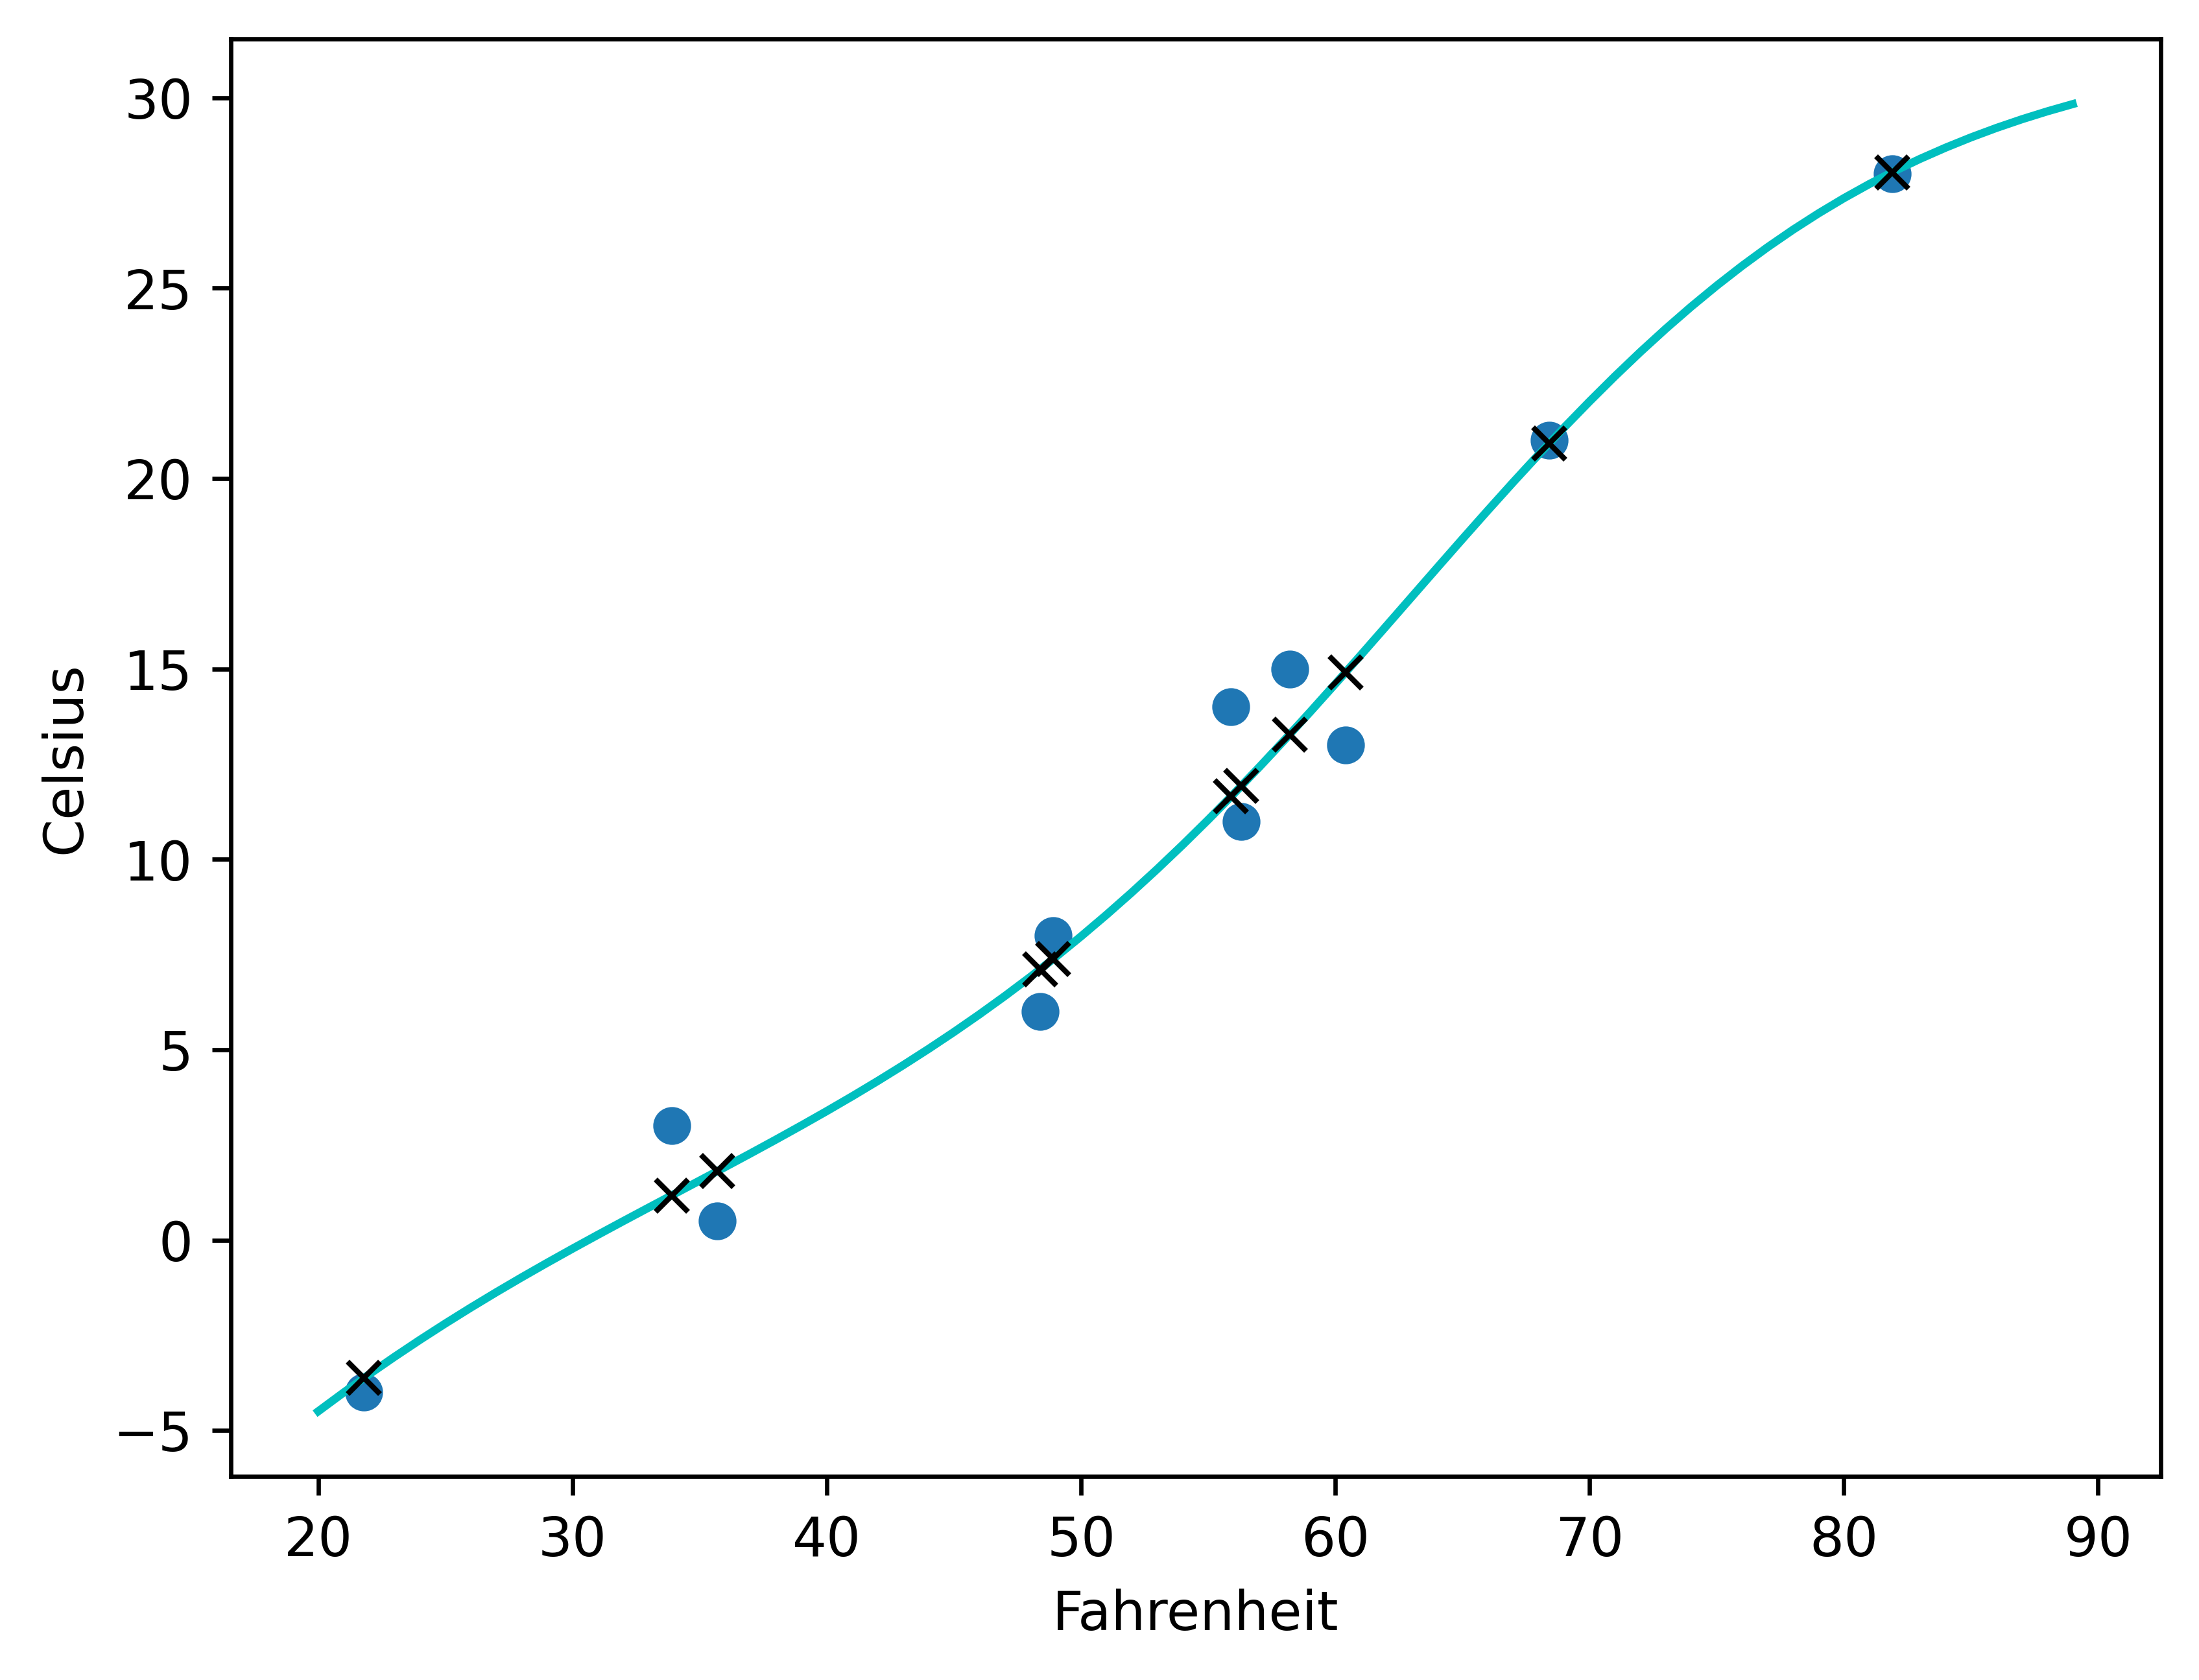

In [110]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')